<a href="https://colab.research.google.com/github/MavielS/classification-biens-de-consommation/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Récupération-des-datas" data-toc-modified-id="Récupération-des-datas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Récupération des datas</a></span></li><li><span><a href="#Exploitation-de-la-colonne-product_category_tree" data-toc-modified-id="Exploitation-de-la-colonne-product_category_tree-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploitation de la colonne product_category_tree</a></span><ul class="toc-item"><li><span><a href="#Catégories-primaires" data-toc-modified-id="Catégories-primaires-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Catégories primaires</a></span></li><li><span><a href="#Catégories-secondaires" data-toc-modified-id="Catégories-secondaires-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Catégories secondaires</a></span></li></ul></li><li><span><a href="#Exploitation-de-la-colonne-description" data-toc-modified-id="Exploitation-de-la-colonne-description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploitation de la colonne description</a></span><ul class="toc-item"><li><span><a href="#Prétraitement-de-la-colonne-description" data-toc-modified-id="Prétraitement-de-la-colonne-description-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Prétraitement de la colonne description</a></span><ul class="toc-item"><li><span><a href="#Suppression-du-bruit" data-toc-modified-id="Suppression-du-bruit-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Suppression du bruit</a></span></li><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Normalisation</a></span></li><li><span><a href="#Stop-Words" data-toc-modified-id="Stop-Words-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Stop-Words</a></span></li></ul></li><li><span><a href="#Premier-K-Means:-Bag-of-Words" data-toc-modified-id="Premier-K-Means:-Bag-of-Words-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Premier K-Means: Bag of Words</a></span><ul class="toc-item"><li><span><a href="#BoW-brut" data-toc-modified-id="BoW-brut-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>BoW brut</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-BoW" data-toc-modified-id="Evaluation-BoW-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span>Evaluation BoW</a></span></li><li><span><a href="#Analyse-des-clusters" data-toc-modified-id="Analyse-des-clusters-3.2.1.3"><span class="toc-item-num">3.2.1.3&nbsp;&nbsp;</span>Analyse des clusters</a></span></li></ul></li><li><span><a href="#BoW-avec-LDA" data-toc-modified-id="BoW-avec-LDA-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>BoW avec LDA</a></span><ul class="toc-item"><li><span><a href="#Evaluation-LDA" data-toc-modified-id="Evaluation-LDA-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Evaluation LDA</a></span></li></ul></li></ul></li><li><span><a href="#Second-K-Means:-TF-IDF" data-toc-modified-id="Second-K-Means:-TF-IDF-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Second K-Means: TF-IDF</a></span><ul class="toc-item"><li><span><a href="#Vectorization" data-toc-modified-id="Vectorization-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Vectorization</a></span></li><li><span><a href="#Evaluation-tf-idf" data-toc-modified-id="Evaluation-tf-idf-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Evaluation tf-idf</a></span><ul class="toc-item"><li><span><a href="#T-SNE" data-toc-modified-id="T-SNE-3.3.2.1"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>T-SNE</a></span></li><li><span><a href="#Quels-sont-les-mots-les-plus-déterminants-pour-chaque-cluster-?" data-toc-modified-id="Quels-sont-les-mots-les-plus-déterminants-pour-chaque-cluster-?-3.3.2.2"><span class="toc-item-num">3.3.2.2&nbsp;&nbsp;</span>Quels sont les mots les plus déterminants pour chaque cluster ?</a></span></li><li><span><a href="#Quels-sont-les-mots-les-moins-déterminants-dans-ce-modèle-?" data-toc-modified-id="Quels-sont-les-mots-les-moins-déterminants-dans-ce-modèle-?-3.3.2.3"><span class="toc-item-num">3.3.2.3&nbsp;&nbsp;</span>Quels sont les mots les moins déterminants dans ce modèle ?</a></span></li></ul></li></ul></li></ul></li></ul></div>

**Objectif du projet**: <br>
Montrer qu'il est possible d'automatiser l'attribution d'une catégorie en fonction de son **image** et de sa **description**. <br>
Sans réaliser ce projet, l'objectif est de faire une étude de la faisabilité. <br>
--> Faire un clustering pour montrer que des catégories se distinguent avec une bon FE. <br>

**Etapes importantes**
- Pré-traitement texte + image --> Création de features
- Clustering
- Visualisation réduction de dimension

**Objectif du notebook** <br>
Montrer l'intérêt de la description pour catégoriser nos produits. <br>

**A faire**:

- Yellowbricks

- Faire code modulaire P6_utils

- Faire un clustering avec un BoW --> Il faudrait réduire la dimension en entrée (taille du vocab.)
    - PCA sur BoW ?
    - Faire un clustering avec features sorties du LDA --> Top 10 mots qui caractérisent notre topic
<br><br>
- Faire un clustering avec un tf-idf

- Regarder seconde partie LDA
- Comment mesurer la qualité du LDA ? (Log-likekihood + perplexity ??)
- Comment évaluer la qualité du clustering (Métriques classiques + ARI avec true_labels dans category_product_tree))

---
---
- Nettoyer product_category_tree pour extraire combien (environ) de catégories existe-t-il.


- Nettoyer *description* 
    - Suppression de stopword spécifiques
    - Lemmatization


Notes: <br>

- Beaucoup de montres ?
- J'ai le chemin dans lequel est rangé chaque produit
- Brand peut etre utile mais beaucoup de missing values
- Product specification nous donnes les infos précises sur ces produits

Créer des features https://towardsdatascience.com/how-to-turn-text-into-features-478b57632e99 

LDA : https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from datetime import datetime
# Fichier perso
import exploration as ex
from p6_utils import *

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

pd.set_option('plotting.backend', 'plotly')
pd.set_option("display.min_rows", 10)
pd.set_option("display.max_columns", 50)
pd.set_option("max_colwidth", 100)

%reload_ext autoreload
%autoreload 2

# Récupération des datas

In [2]:
from dataprep.eda import create_report

In [3]:
df_desc = pd.read_csv('data\description_product.csv')

In [177]:
df_desc.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                                                                       product_url  \
0       http://www.flipkart.com/elegance-polyester-multicolor-abstract-eyelet-door-curtain/p/itmeg7bkzdgthcts?pid=CRNEG7BKMFFYHQ8Z   
1                                       http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH   
2                              http://www.flipkart.com/eurospa-cotton-terry-face-towel-set/p/itmeg6shbrpubhca?pid=BTWEG6SHXTDB2A2Y   
3  http://www.flipkart.com/santosh-royal-fashion-cotton-printed-king-sized-double-bedsheet/p/itmejt9uaqahahuf?pid=BDSEJT9UQWHDUBH4   
4            http://www.flipkart.com/jaipur-print-cotton-floral-king-sized-double-bedsheet/p/itmejthnwahrnt7v?pid=BDSEJTHNGWVGWWQU   

                                                      product_name  \
0       Elegance Polyester Multicolor Abstract Eyelet Door Curtain   
1                                       Sathiyas Cotton Bath Towel   
2                              Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet   
4            Jaipur Print Cotton Floral King sized Double Bedsheet   

                                                                                                                       product_category_tree  \
0                           ["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]   
2   ["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Eurospa Baby Bath Towels >> Eurospa Cotton Terry Face Towel Set (20 PIECE FA..."]   
3    ["Home Furnishing >> Bed Linen >> Bedsheets >> SANTOSH ROYAL FASHION Bedsheets >> SANTOSH ROYAL FASHION Cotton Printed King sized ..."]   
4             ["Home Furnishing >> Bed Linen >> Bedsheets >> Jaipur Print Bedsheets >> Jaipur Print Cotton Floral King sized Double Bed..."]   

                pid  retail_price  discounted_price  \
0  CRNEG7BKMFFYHQ8Z        1899.0             899.0   
1  BTWEGFZHGBXPHZUH         600.0             449.0   
2  BTWEG6SHXTDB2A2Y           NaN               NaN   
3  BDSEJT9UQWHDUBH4        2699.0            1299.0   
4  BDSEJTHNGWVGWWQU        2599.0             698.0   

                                  image  is_FK_Advantage_product  \
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg                    False   
1  7b72c92c2f6c40268628ec5f14c6d590.jpg                    False   
2  64d5d4a258243731dc7bbb1eef49ad74.jpg                    False   
3  d4684dcdc759dd9cdf41504698d737d8.jpg                    False   
4  6325b6870c54cd47be6ebfbffa620ec7.jpg                    False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [9]:
report = create_report(df_desc)

  0%|          | 0/1526 [00:00<?, ?it/s]

In [10]:
report.show_browser()

Je ne garde que les variables contenant des informations utiles à la classification

In [150]:
list(df_desc.columns)

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'retail_price',
 'discounted_price',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications']

In [4]:
var_useful = [   
#                  'uniq_id',
#                  'crawl_timestamp', # Quand l'info a été récup
#                  'product_url', # URl de la photo (qui n'existe plus)
                 'product_name', 
                 'product_category_tree', # Dans quelles catégories ces produits sont rangés
#                  'pid', # PID = Product ID ?
                 'retail_price',
#                  'discounted_price', # Prix en solde: Pas intéréssant pour notre classification
                 'image', # Nous permet de lier nos descriptions aux images
#                  'is_FK_Advantage_product',
                 'description',
#                  'product_rating',
#                  'overall_rating',
#                  'brand', 
                 'product_specifications'
             ]

# Exploitation de la colonne product_category_tree

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
import re

In [95]:
def separate_categ(s: str):
    to_return = s.replace('[', '').replace(']', '').replace('&', 'and').replace('"','')
    to_return = to_return.split('>>')
    for ind in range(len(to_return)):
        to_return[ind] = to_return[ind].strip()
    to_return = ','.join(to_return[:])
    to_return = to_return.lower()
    
    to_return = to_return.replace('&', 'and')
    return to_return

separate_categ('oui >> non >> OK >> pas ok')

'oui,non,ok,pas ok'

In [96]:
to_clean = df_desc.product_category_tree.apply(func=separate_categ)
to_clean

0       home furnishing,curtains and accessories,curtains,elegance polyester multicolor abstract eyelet ...
1       baby care,baby bath and skin,baby bath towels,sathiyas baby bath towels,sathiyas cotton bath tow...
2       baby care,baby bath and skin,baby bath towels,eurospa baby bath towels,eurospa cotton terry face...
3       home furnishing,bed linen,bedsheets,santosh royal fashion bedsheets,santosh royal fashion cotton...
4       home furnishing,bed linen,bedsheets,jaipur print bedsheets,jaipur print cotton floral king sized...
                                                       ...                                                 
1045                                           baby care,baby and kids gifts,stickers,oren empower stickers
1046                                             baby care,baby and kids gifts,stickers,wallmantra stickers
1047                                               baby care,baby and kids gifts,stickers,uberlyfe stickers
1048                        

In [97]:
to_clean.isna().sum()

0

J'observe que product_category_tree décompose en de nombreuses sous-catégories, jusqu'à arriver au nom du produit. <br>
Pour l'instant, je ne vais m'intéresser qu'à la 'root' de cet arbre et je vais compter combien de catégories 'primaires' différentes j'ai dans ce dataset. <b>

## Catégories primaires

In [98]:
main_categories = to_clean.apply(func= lambda x: x.split(',')[0])

In [99]:
re.findall(('[^,]+'), main_categories[0])

['home furnishing']

In [100]:
vectorizer = CountVectorizer(token_pattern='[^,]+')
X = vectorizer.fit_transform(main_categories.values)

In [101]:
cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
cv_dataframe

baby care  beauty and personal care  computers  \
0             0                         0          0   
1             1                         0          0   
2             1                         0          0   
3             0                         0          0   
4             0                         0          0   
...         ...                       ...        ...   
1045          1                         0          0   
1046          1                         0          0   
1047          1                         0          0   
1048          1                         0          0   
1049          1                         0          0   

      home decor and festive needs  home furnishing  kitchen and dining  \
0                                0                1                   0   
1                                0                0                   0   
2                                0                0                   0   
3                                0                1                   0   
4                                0                1                   0   
...                            ...              ...                 ...   
1045                             0                0                   0   
1046                             0                0                   0   
1047                             0                0                   0   
1048                             0                0                   0   
1049                             0                0                   0   

      watches  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1045        0  
1046        0  
1047        0  
1048        0  
1049        0  

[1050 rows x 7 columns]

In [102]:
cv_dataframe.sum().sort_values(ascending=False)

baby care                       150
beauty and personal care        150
computers                       150
home decor and festive needs    150
home furnishing                 150
kitchen and dining              150
watches                         150
dtype: int64

J'ai **7 catégories** primaires avec chacune 150 produits, ces clusters sont équilibrés.

## Catégories secondaires

In [103]:
secondary_categories = to_clean.apply(func=lambda x: x.split(',')[1]) # Je récupère les 2 premières catégories
# secondary_categories = secondary_categories.apply(func= lambda x: ','.join(x)) # J'assemble en une chaine de caractères ces 2 catégories
secondary_categories

0       curtains and accessories
1             baby bath and skin
2             baby bath and skin
3                      bed linen
4                      bed linen
                  ...           
1045         baby and kids gifts
1046         baby and kids gifts
1047         baby and kids gifts
1048         baby and kids gifts
1049         baby and kids gifts
Name: product_category_tree, Length: 1050, dtype: object

In [104]:
re.findall(('[^,]+'), secondary_categories[0])

['curtains and accessories']

In [105]:
vectorizer = CountVectorizer(token_pattern='[^,]+')
X = vectorizer.fit_transform(secondary_categories.values)

In [106]:
cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
cv_dataframe

baby and kids gifts  baby bath and skin  baby bedding  baby grooming  \
0                       0                   0             0              0   
1                       0                   1             0              0   
2                       0                   1             0              0   
3                       0                   0             0              0   
4                       0                   0             0              0   
...                   ...                 ...           ...            ...   
1045                    1                   0             0              0   
1046                    1                   0             0              0   
1047                    1                   0             0              0   
1048                    1                   0             0              0   
1049                    1                   0             0              0   

      bar and glassware  bath and spa  bath linen  beauty accessories  \
0                     0             0           0                   0   
1                     0             0           0                   0   
2                     0             0           0                   0   
3                     0             0           0                   0   
4                     0             0           0                   0   
...                 ...           ...         ...                 ...   
1045                  0             0           0                   0   
1046                  0             0           0                   0   
1047                  0             0           0                   0   
1048                  0             0           0                   0   
1049                  0             0           0                   0   

      bed linen  body and skin care  candles and fragrances  clocks  \
0             0                   0                       0       0   
1             0                   0                       0       0   
2             0                   0                       0       0   
3             1                   0                       0       0   
4             1                   0                       0       0   
...         ...                 ...                     ...     ...   
1045          0                   0                       0       0   
1046          0                   0                       0       0   
1047          0                   0                       0       0   
1048          0                   0                       0       0   
1049          0                   0                       0       0   

      coffee mugs  combos and kits  computer components  computer peripherals  \
0               0                0                    0                     0   
1               0                0                    0                     0   
2               0                0                    0                     0   
3               0                0                    0                     0   
4               0                0                    0                     0   
...           ...              ...                  ...                   ...   
1045            0                0                    0                     0   
1046            0                0                    0                     0   
1047            0                0                    0                     0   
1048            0                0                    0                     0   
1049            0                0                    0                     0   

      consumables and disposables  containers and bottles  cookware  \
0                               0                       0         0   
1                               0                       0         0   
2                               0                       0         0   
3                               0                       0         0   
4          

In [107]:
cv_dataframe.sum().sort_values(ascending=False)

wrist watches                  149
laptop accessories              87
infant wear                     84
coffee mugs                     74
showpieces                      71
                              ... 
dinnerware and crockery          1
men's grooming                   1
beauty accessories               1
kripa's home furnishing          1
consumables and disposables      1
Length: 62, dtype: int64

Les catégories secondaires sont au nombre de 62. <br>
Je remarque en outre que certains labels n'ont qu'une seule occurence (un seul produit à cette catégorie secondaire) <br>

In [108]:
cv_dataframe.sum()[(cv_dataframe.sum() > 30)].sort_values(ascending=False) # Catégories avec + de 30 occurences

wrist watches         149
laptop accessories     87
infant wear            84
coffee mugs            74
showpieces             71
bed linen              65
fragrances             65
network components     49
dtype: int64

... Ces catégories pourront être considérées plus tard

# Exploitation de la colonne description

## Prétraitement de la colonne description

In [11]:
from dataprep.clean import clean_text
from dataprep.eda import plot_missing

### Suppression du bruit

The pipeline for the clean_text() function is the following:

    lowercase: Convert all characters to lowercase.
    remove_digits: Remove numbers.
    remove_urls: Remove URLs.
    remove_punctuation: Remove punctuation marks.
    remove_accents: Remove accent marks.
    remove_whitespace: Remove extra spaces, and tabs and newlines.
    remove_html Remove HTML tags.


In [12]:
custom_pipeline = [
    {"operator": "lowercase"},
    {"operator": "remove_digits"},
    {"operator": "remove_urls"},
    {"operator": "remove_punctuation"},
    {"operator": "remove_accents"},
    {"operator": "remove_whitespace"},
    {"operator": "remove_html"},
]

description = clean_text(df_desc, 'description', pipeline=custom_pipeline).description

In [13]:
description.sample(5)

344    flipkart com buy anna andre paris majesty deodorant combo set online only for rs from flipkart c...
711    frabjous floral single quilts comforters multicolor quits \r  price rs \r     \r    lightweight ...
966    checkered chef steel all purpose scissor red black silver pack of price rs your search is over y...
832    buy bigkik flexible lamp mini portable designer usb led light for rs online bigkik flexible lamp...
697    buy wallmantra abstract colors modern art wall hanging canvas painting for rs online wallmantra ...
Name: description, dtype: object

### Normalisation

Lemmatisation (Renvoie à la racine du mot)

Quelle librairie utilisée ? <br>
spaCy, ntlk, TextBlob...

In [14]:
import nltk
import string
from nltk.corpus import wordnet
# from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


lem = WordNetLemmatizer()

sentence = "This is just a test, you have to chill man. You really need to lower your expectations."

# Lemmatization with POS tag
print(" ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

This be just a test you have to chill man You really need to low your expectation


In [15]:
description = description.apply(func = lambda sentence: " ".join([lem.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence) if w not in string.punctuation]))

In [16]:
description.sample(5)

171    buy prithish we re all mad here ceramic mug for r online prithish we re all mad here ceramic mug...
974    key feature of jaycoknit mediterranean sea s lucky wooden handcraft ship part ii showpiece cm wo...
425    specification of zingalalaa lp lm lead cord portable projector multicolor performance feature as...
886    buy jaipur raga floral double quilt comforter red at r at flipkart com only genuine product free...
215    king international ergonomic design with long gripped handle roll pizza cutter stainless steel p...
Name: description, dtype: object

### Stop-Words

In [17]:
from nltk.corpus import stopwords

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

def remove_stopwords(text: str, stop_words: list):
    words = [word for word in text.split() if word.lower() not in stop_words]

    return ' '.join(words)

description = description.apply(func=lambda x: remove_stopwords(x, stop_words))

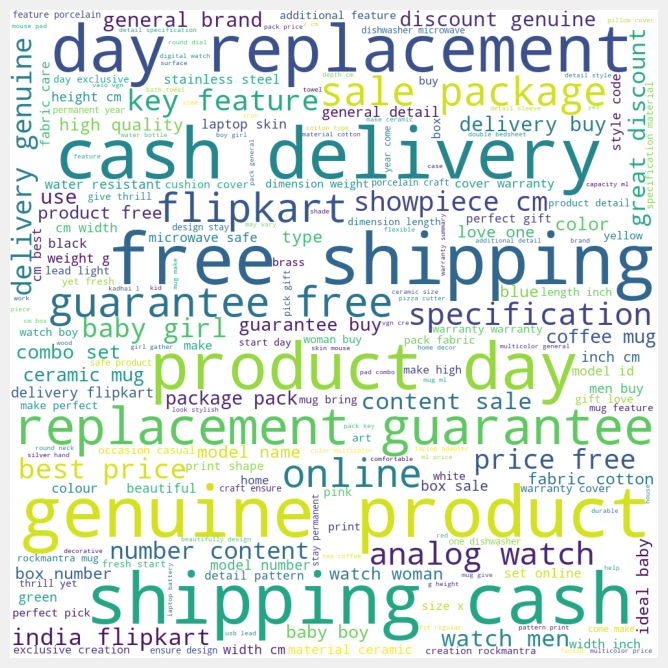

In [18]:
from wordcloud import WordCloud

long_string = ','.join(description.values)
wordcloud = WordCloud(background_color="white", max_words=200, contour_width=3, width=1000, height=1000, contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Je repère des stop-words spécifiques à ce dataset

In [19]:
##Creating a list of custom stopwords
new_words =  ['product', 'free', 'cm', 'buy', 'delivery', 'shipping', 'genuine', 'cash', 'price', 'replacement', 'day', 'flipkart', 'com', 'guarantee', 'feature', 
              'online', 'specification', 'color', 'type', 'material', 'general', 'number', 'brand', 'best', 'key', 'size', 'dimension', 'sale', 'discount', 'pack', 'package', 'box']

stop_words = stop_words.union(new_words)
cleaned_desc = description.apply(func=lambda x: remove_stopwords(x, stop_words))

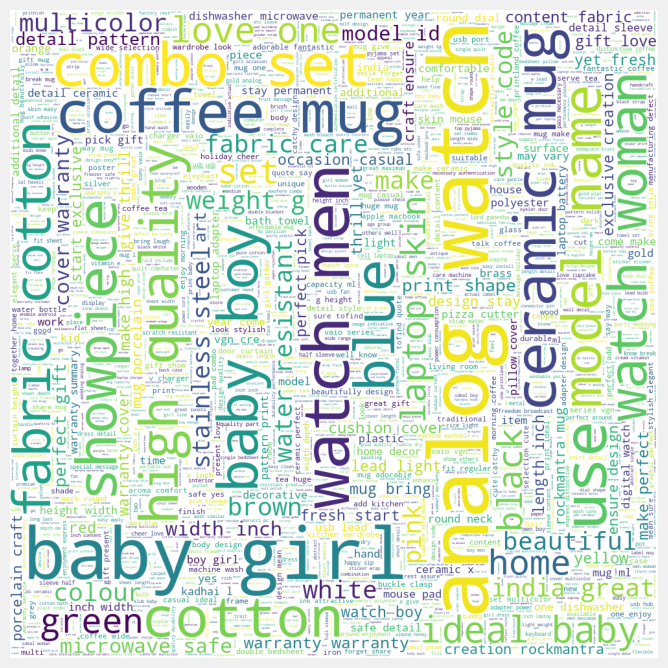

In [20]:
long_string = ','.join(cleaned_desc.values)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, width=1000, height=1000, contour_color='steelblue')
wordcloud.generate(long_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [109]:
# J'ajoute le true label à mes descriptions cleanés
le = LabelEncoder()

frame = { 'description':cleaned_desc, 'label':le.fit_transform(main_categories)}
true_labels = pd.DataFrame(frame)
true_labels

description  \
0     elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester mul...   
1     sathiyas cotton bath towel bath towel red yellow blue bath towel machine washable yes cotton des...   
2     eurospa cotton terry face towel set small height inch gsm eurospa cotton terry face towel set pi...   
3     santosh royal fashion cotton print king double bedsheet royal bedsheet perfact wedding gift sant...   
4     jaipur print cotton floral king double bedsheet cotton jaipur print cotton floral king double be...   
...                                                                                                   ...   
1045  oren empower extra large self adhesive sticker r double sticker use big wall two piece arrange a...   
1046  wallmantra large vinyl sticker sticker r bring home exclusive piece wall art give home refresh l...   
1047  uberlyfe extra large pigment polyvinyl film import sticker r uberlyfe extra large pigment polyvi...   
1048                    wallmantra medium vinyl sticker sticker r wallmantra medium vinyl sticker sticker   
1049                                          uberlyfe large vinyl sticker r uberlyfe large vinyl sticker   

      label  
0         4  
1         0  
2         0  
3         4  
4         4  
...     ...  
1045      0  
1046      0  
1047      0  
1048      0  
1049      0  

[1050 rows x 2 columns]

## Premier K-Means: Bag of Words

Ici l'idée est de faire un K-means avec en input le BoW des descriptions des produits. <br>
On considérera le nombre minimal d'occurences de notre BoW comme un hyperparamètre.

In [21]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

### BoW brut

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

#### Vectorization

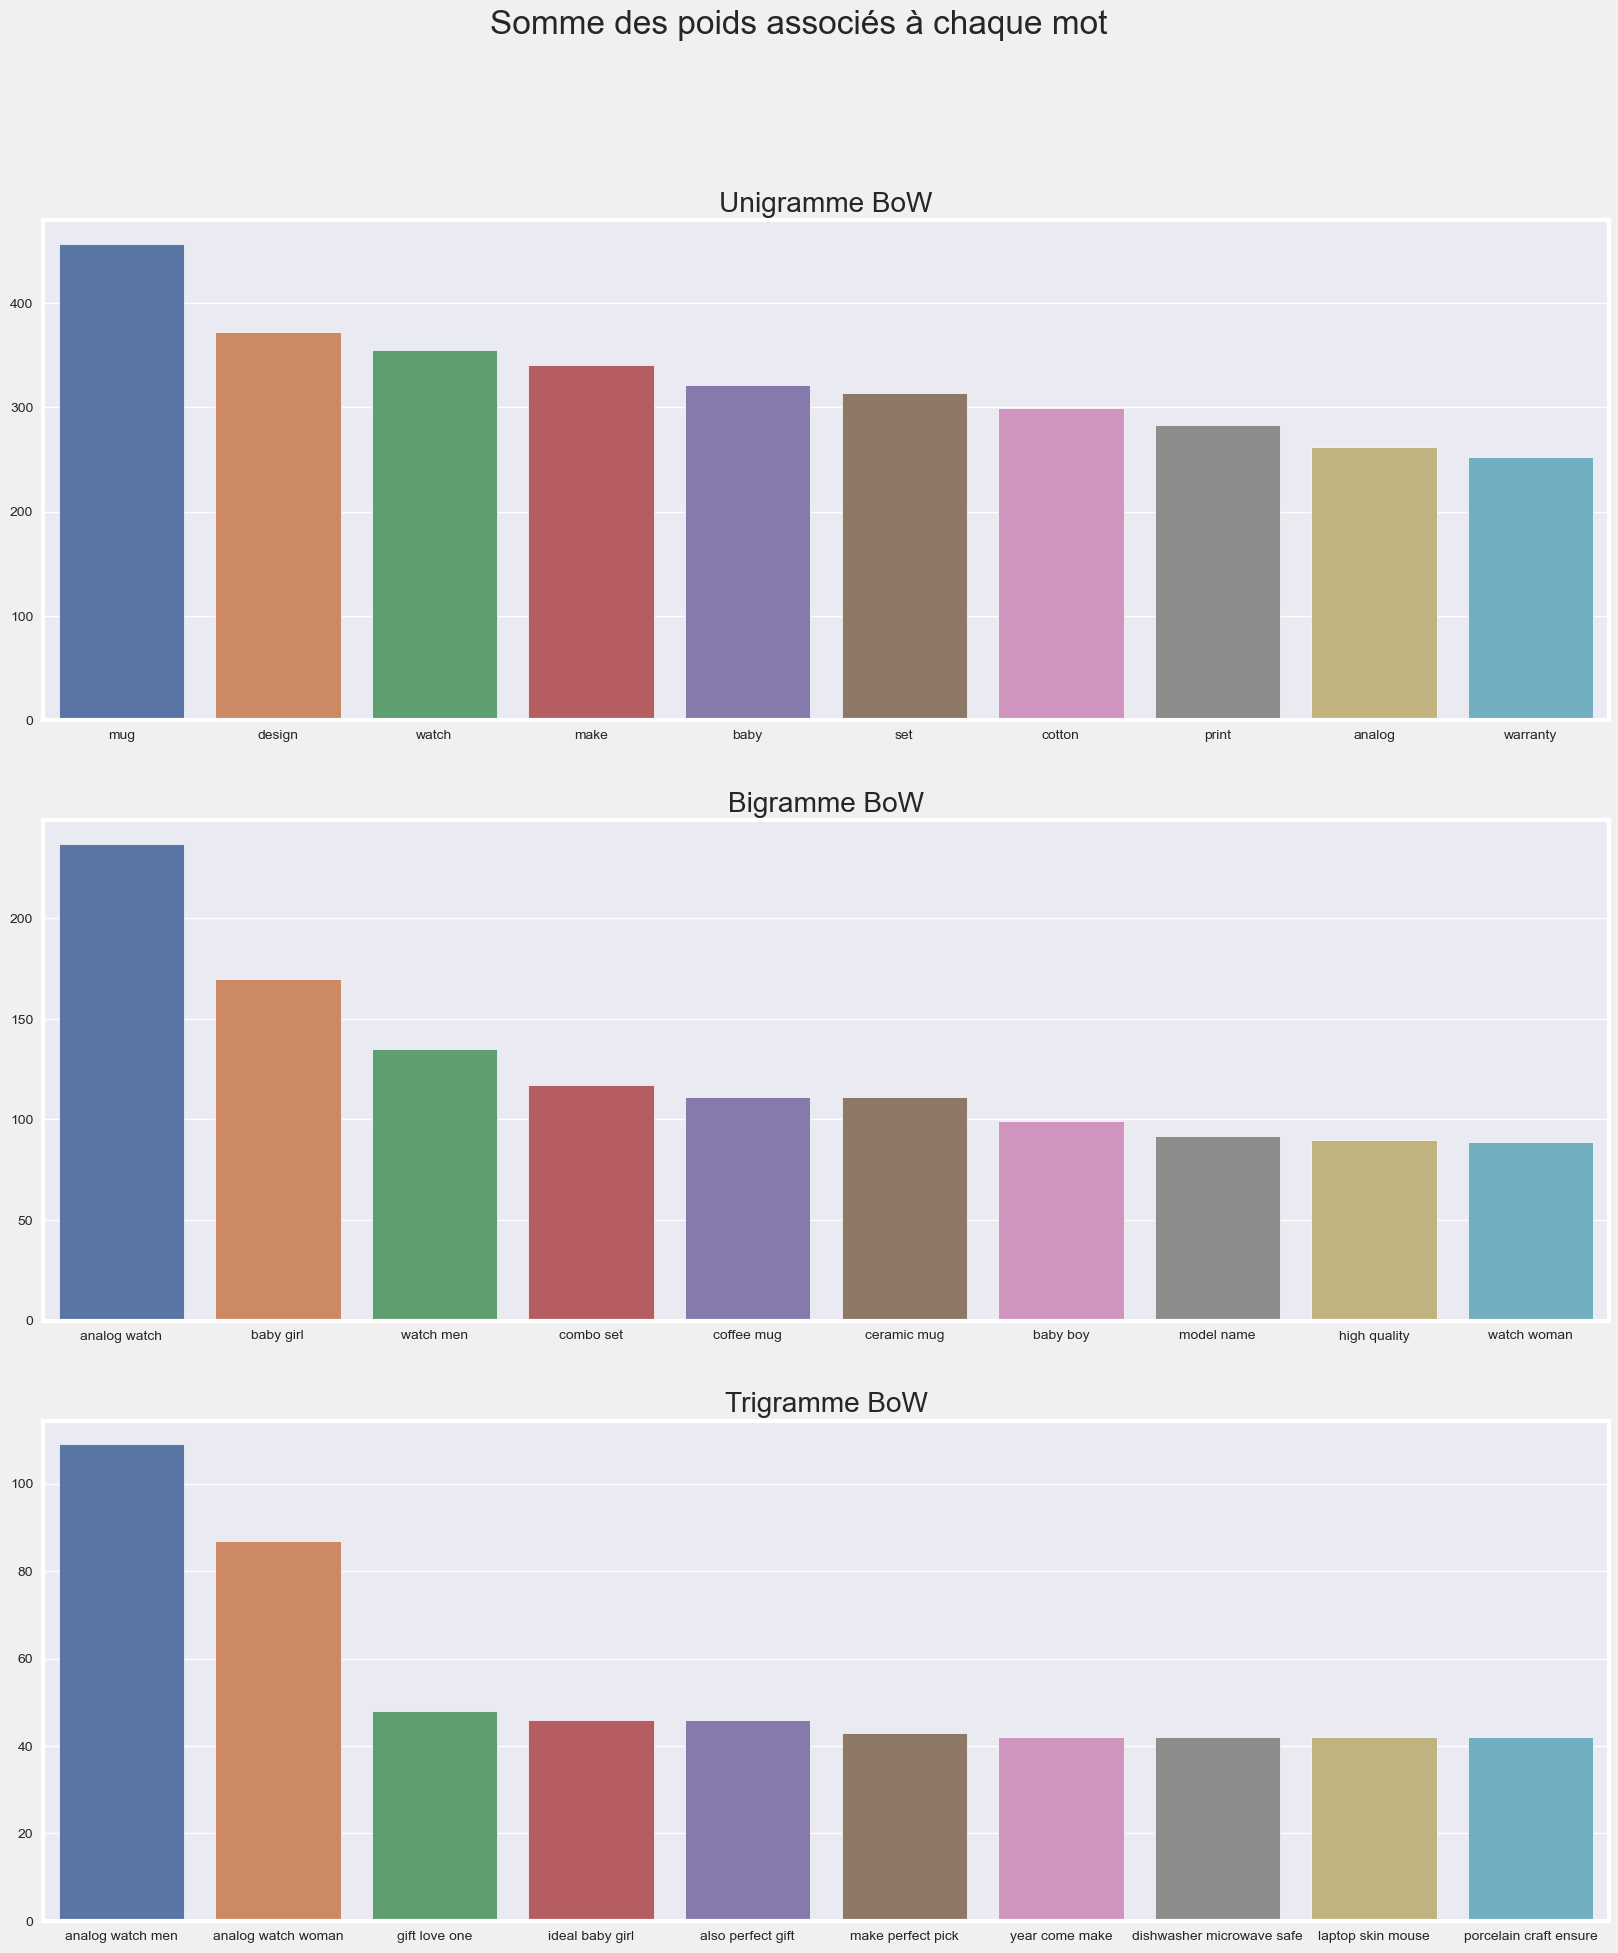

In [267]:
plot_n_gramms(cleaned_desc, CountVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme BoW', 'Bigramme BoW', 'Trigramme BoW'])

A partir de 3 mots les associations ne semblent plus pertinents.

---

#### Evaluation BoW

Je créé 3 BoWs: Un avec des unigrammes uniquements, un avec des bigrammes uniquement et un avec les 2.

---Unigramme---
0 mots -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 mots -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 mots -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 mots -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 mots -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 mots -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 mots -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 mots -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 mots -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 mots -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 mots -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 mots -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 mots -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 mots -- (ngramm:(1, 1)) Taille: (1050, 10), Sparcity: 15.010 %
140 mots -- (ngramm:(1, 1)) Taille: (1050, 9), Sparcity: 15.

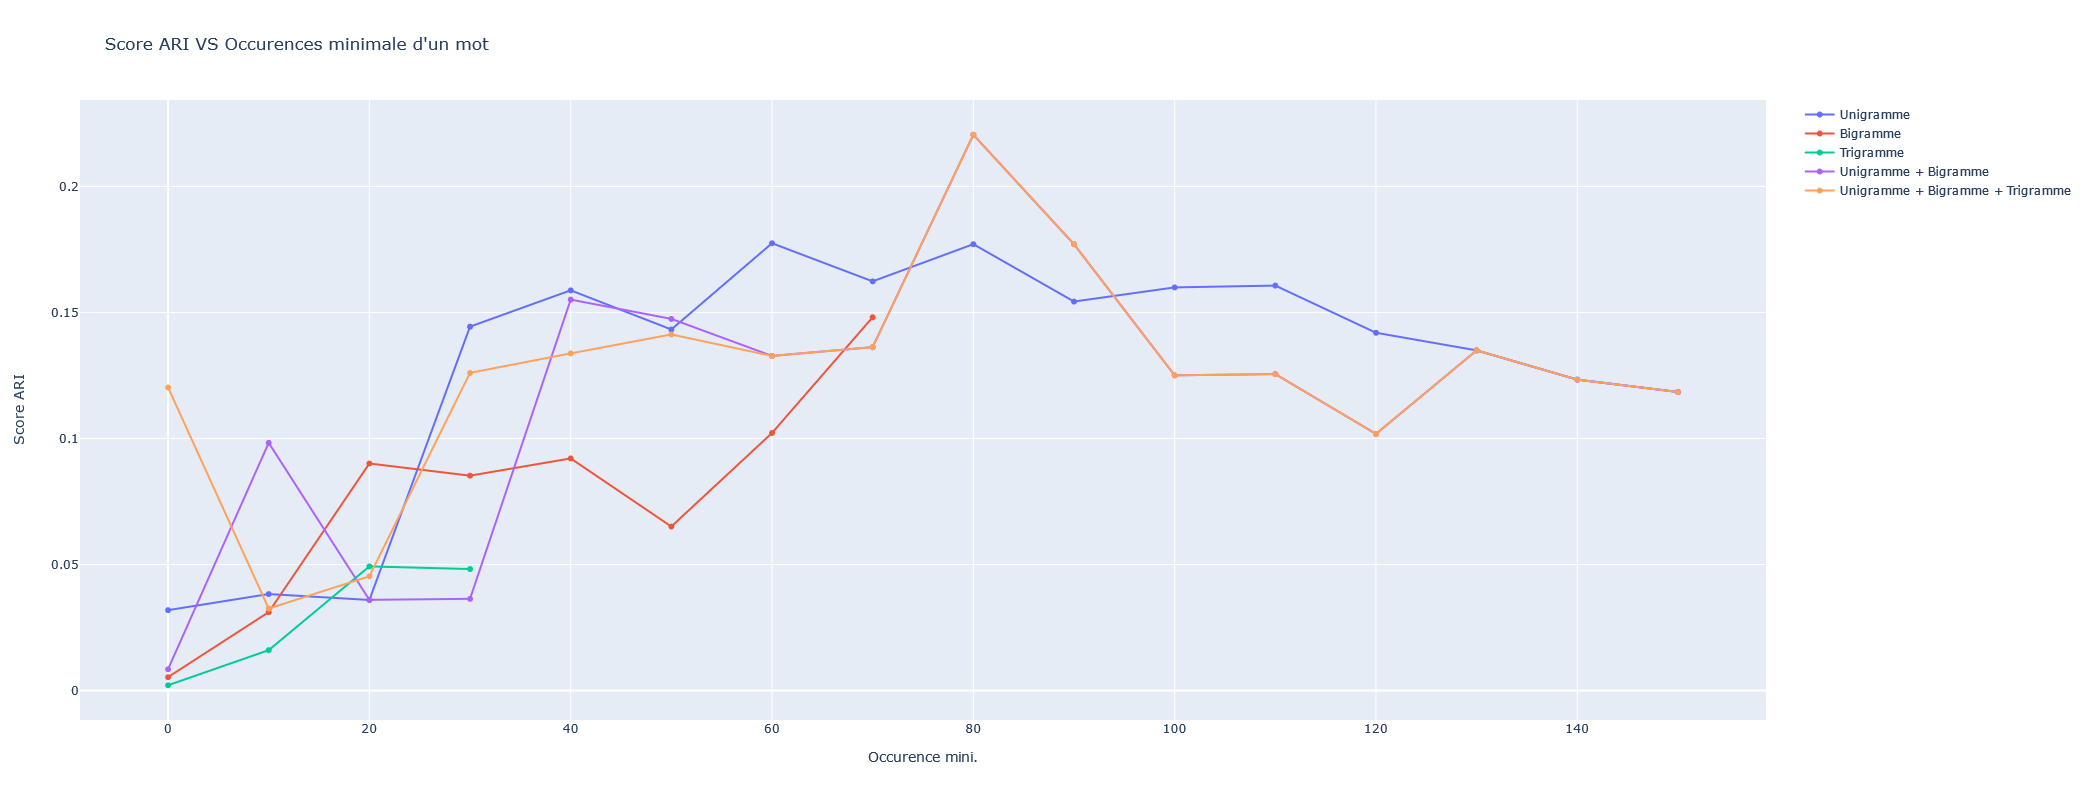

In [259]:
model = KMeans(n_clusters = 7, random_state=42)
vec = CountVectorizer

print('---Unigramme---')
bows, vectorizers = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
bows_bi, vectorizers_bi = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
bows_tri, vectorizers_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
bows_both, vectorizers_both = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
bows_uni_tri, vectorizers_uni_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([bows, bows_bi, bows_tri, bows_both, bows_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

**Unigramme**: A partir de 150 occurences mini, plus de clusters que de mots. <br>
**Bigramme**: A partir de 70 occurences mini. <br>
**Both**: A partir de 150 occurences mini. <br>

Le meilleur jeu d'entrainement est celui composé d'unigramme + bigramme. <br>
Meilleur ARI score (0,22) atteint avec une occurence de 80 minimum. <br>

Ce score reste cependant très faible et on peut donc avancer que cette méthode de feature extraction n'est pas la meilleure.

#### Analyse des clusters

Le jeu de données retenu est le suivant:

In [177]:
best_bow = bows_both[8]
best_vectorizer = vectorizers_both[8]
kmeans.fit_transform(best_bow)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.22050055396672888

##### T-SNE

In [143]:
from sklearn.manifold import TSNE

In [178]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    101
1     88
2     68
3     78
4    139
5    541
6     35
dtype: int64

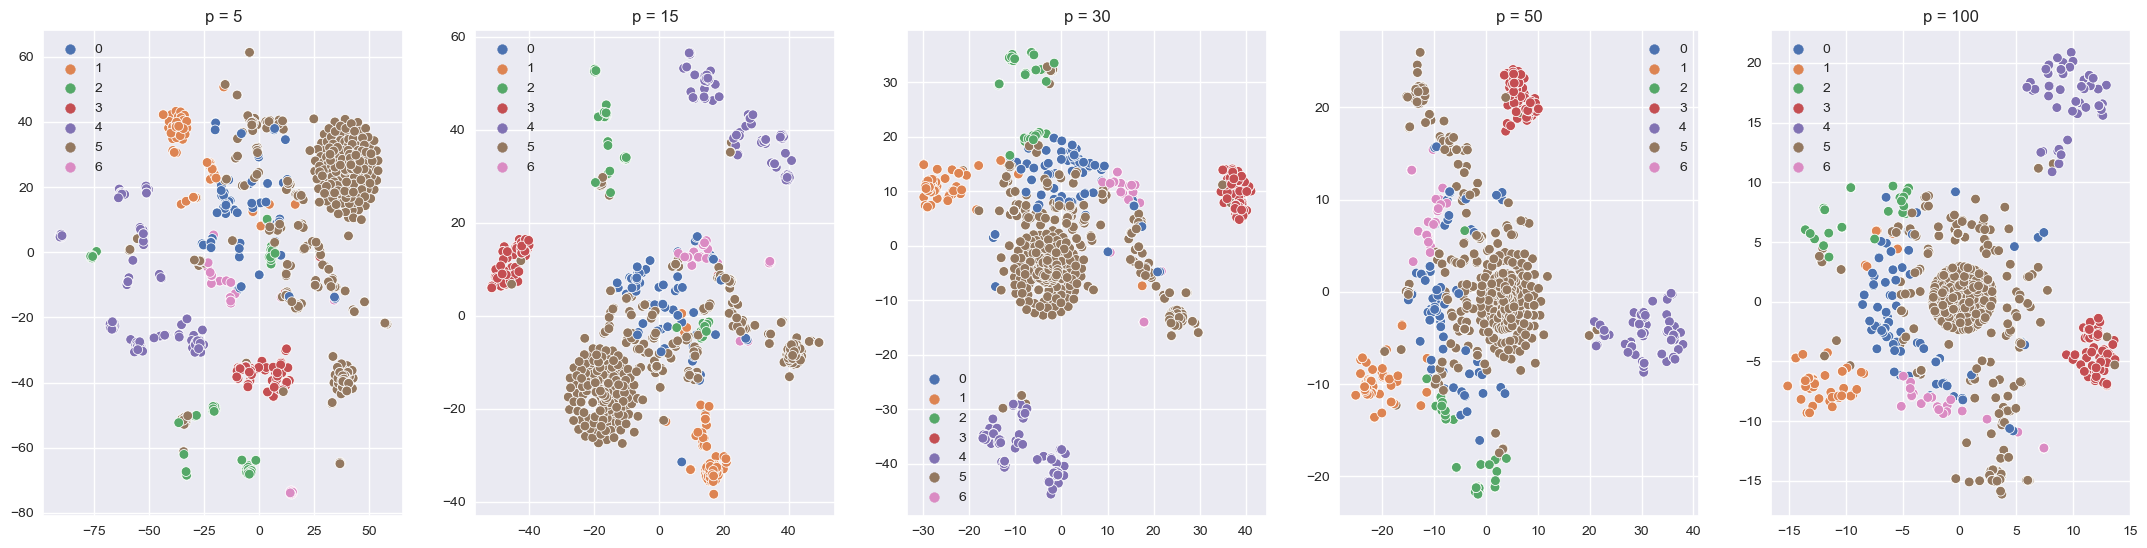

In [152]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_bow)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

Certains produits sont correctement classifiés dans leur catégorie (clusters 1, 2, 3, 4), mais la majeure partie des produits ne se différencient pas (cluster 5 --> 541 produits dans le même cluster). <br>

##### Quels sont les mots les plus déterminants pour chaque cluster ?

In [183]:
best_df = pd.DataFrame(data = best_bow.toarray(), columns=best_vectorizer.get_feature_names())
best_df['label'] = kmeans.labels_

top_5_words = []

for label in set(kmeans.labels_):
    top_5_words.append(best_df[best_df.label == label].drop('label', axis=1).sum(axis=0).sort_values(ascending=False)[:5].index.tolist())

top_5_words

[['design', 'model', 'quality', 'inch', 'make'],
 ['showpiece', 'gift', 'home', 'make', 'model'],
 ['ceramic', 'make', 'gift', 'quality', 'design'],
 ['baby', 'detail', 'girl', 'fabric', 'cotton'],
 ['watch', 'analog', 'analog watch', 'men', 'great'],
 ['set', 'combo', 'combo set', 'use', 'model'],
 ['inch', 'print', 'set', 'cotton', 'multicolor']]

##### Quels sont les mots les moins déterminants dans ce modèle ?

In [184]:
from sklearn.tree import DecisionTreeClassifier

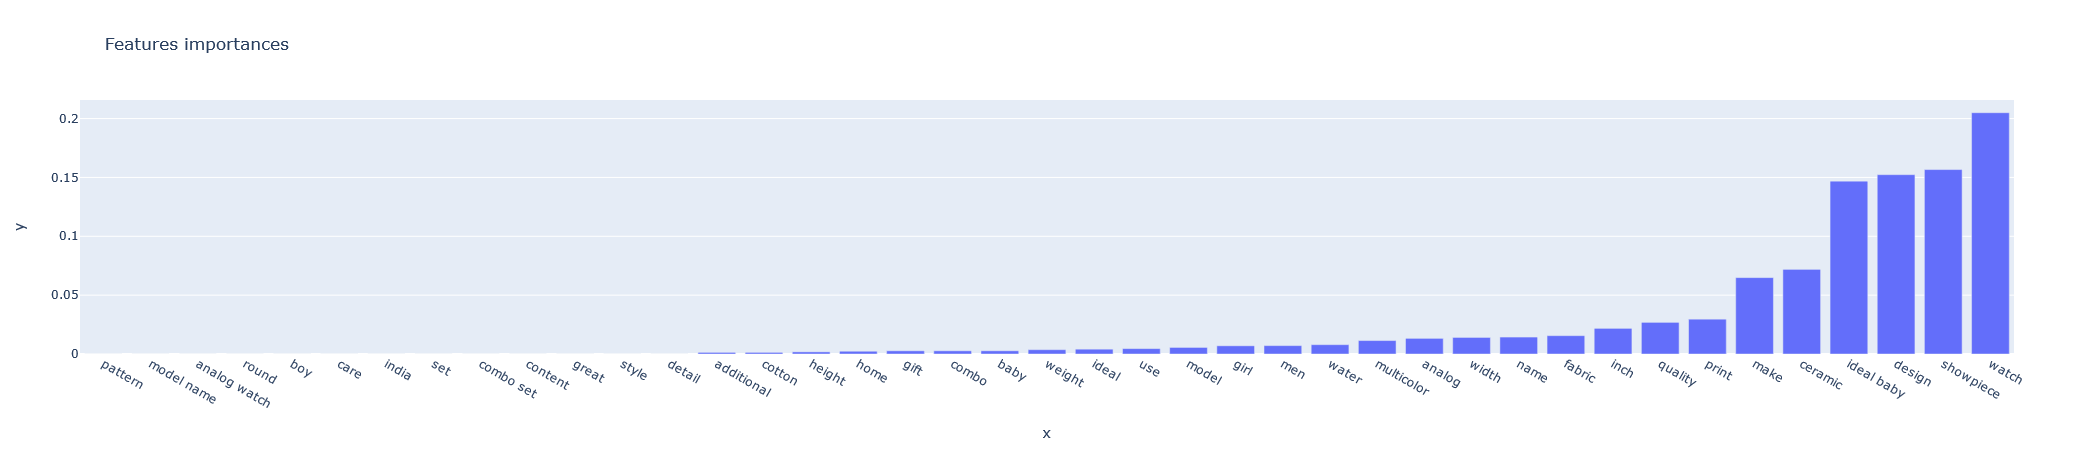

In [185]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(best_bow, kmeans.labels_)

feature_importances = pd.Series(dt.feature_importances_,
                                index = best_vectorizer.get_feature_names(),
                                name='Feature importance')\
                                .sort_values(ascending=True)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')

### BoW avec LDA

A l'aide d'un algorithme non-supervisé tel que le LDA ou le NMF, je vais ici chercher à définir quels mots caractérisent une des catégories primaires extraites précédemment

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/ 

In [186]:
from sklearn.decomposition import LatentDirichletAllocation

n_topics = 7

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=10, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(best_bow)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          n_components=7, random_state=0)

In [187]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])) # Je récupère les mots avec le meilleur score pour ce topic

no_top_words = 20
display_topics(lda, best_vectorizer.get_feature_names(), no_top_words)

Topic 0:
gift great additional design watch india make width cotton boy inch ceramic analog analog watch men print height weight care content
Topic 1:
inch print multicolor model cotton content width make name model name quality weight style height fabric pattern design additional care use
Topic 2:
set combo combo set care content quality ideal print detail use multicolor make model name name model gift additional style cotton baby
Topic 3:
watch analog analog watch men india great water round boy style ideal girl use inch model make width home height content
Topic 4:
baby girl cotton fabric detail ideal boy print pattern ideal baby content care style additional round use water make weight home
Topic 5:
make design quality home ceramic use gift detail style height weight model pattern fabric care round water print india width
Topic 6:
model showpiece design height name width model name weight content use water ideal additional care set pattern home gift india round


#### Evaluation LDA

Ici je ne garde dans mon BoW que les mots sélectionnés par le LDA

## Second K-Means: TF-IDF

In [193]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tf_vectorizer = TfidfVectorizer()
tf_idf = tf_vectorizer.fit_transform(cleaned_desc)


feature_names = tf_vectorizer.get_feature_names()
dense = tf_idf.todense()
denselist = dense.tolist()
tmp = pd.DataFrame(denselist, columns=feature_names)
tmp

aa  aaa  aapno  aari  aarika  ability  abkl  able  abode  abrasion  \
0     0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
1     0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
2     0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
3     0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
4     0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
...   ...  ...    ...   ...     ...      ...   ...   ...    ...       ...   
1045  0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
1046  0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
1047  0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
1048  0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   
1049  0.0  0.0    0.0   0.0     0.0      0.0   0.0   0.0    0.0       0.0   

      abroad  absolute  absorb  absorbency  absorbent  absorber  absorbs  \
0        0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
1        0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
2        0.0       0.0     0.0    0.067098        0.0       0.0      0.0   
3        0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
4        0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
...      ...       ...     ...         ...        ...       ...      ...   
1045     0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
1046     0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
1047     0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
1048     0.0       0.0     0.0    0.000000        0.0       0.0      0.0   
1049     0.0       0.0     0.0    0.000000        0.0       0.0      0.0   

      abstract  abstrcts   ac  accent  access  accessory  accident  \
0     0.173399       0.0  0.0     0.0     0.0        0.0       0.0   
1     0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
2     0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
3     0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
4     0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
...        ...       ...  ...     ...     ...        ...       ...   
1045  0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
1046  0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
1047  0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
1048  0.000000       0.0  0.0     0.0     0.0        0.0       0.0   
1049  0.000000       0.0  0.0     0.0     0.0        0.0       0.0   

      accidental  ...  yiboo  yield   yk   yl   ym  york  young  youth  \
0            0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
1            0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
2            0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
3            0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
4            0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
...          ...  ...    ...    ...  ...  ...  ...   ...    ...    ...   
1045         0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
1046         0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
1047         0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
1048         0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   
1049         0.0  ...    0.0    0.0  0.0  0.0  0.0   0.0    0.0    0.0   

      youthful   yr  yuva  yves  yxk  zaicus  zero  zikrak  zinc  zingalalaa  \
0          0.0  0.0   0.0   0.0  0.0     0.0   0.0     0.0   0.0         0.0   
1          0.0  0.0   0.0   0.0  0.0     0.0   0.0     0.0   0.0         0.0   
2          0.0  0.0   0.0   0.0  0.0     0.0   0.0     0.0   0.0         0.0   
3          0.0  0.0   0.0   0.0  0.0     0.0   0.0     0.0   0.0         0.0   
4          0.0  0.0   0.0   0.0  0.0   

In [31]:
tmp.sum().sort_values(ascending=False)[:10]

watch        33.873848
analog       29.181085
set          28.964949
mug          28.191971
combo        22.713037
baby         22.230619
showpiece    21.394332
cotton       20.667412
men          19.359793
girl         18.207449
dtype: float64

### Vectorization

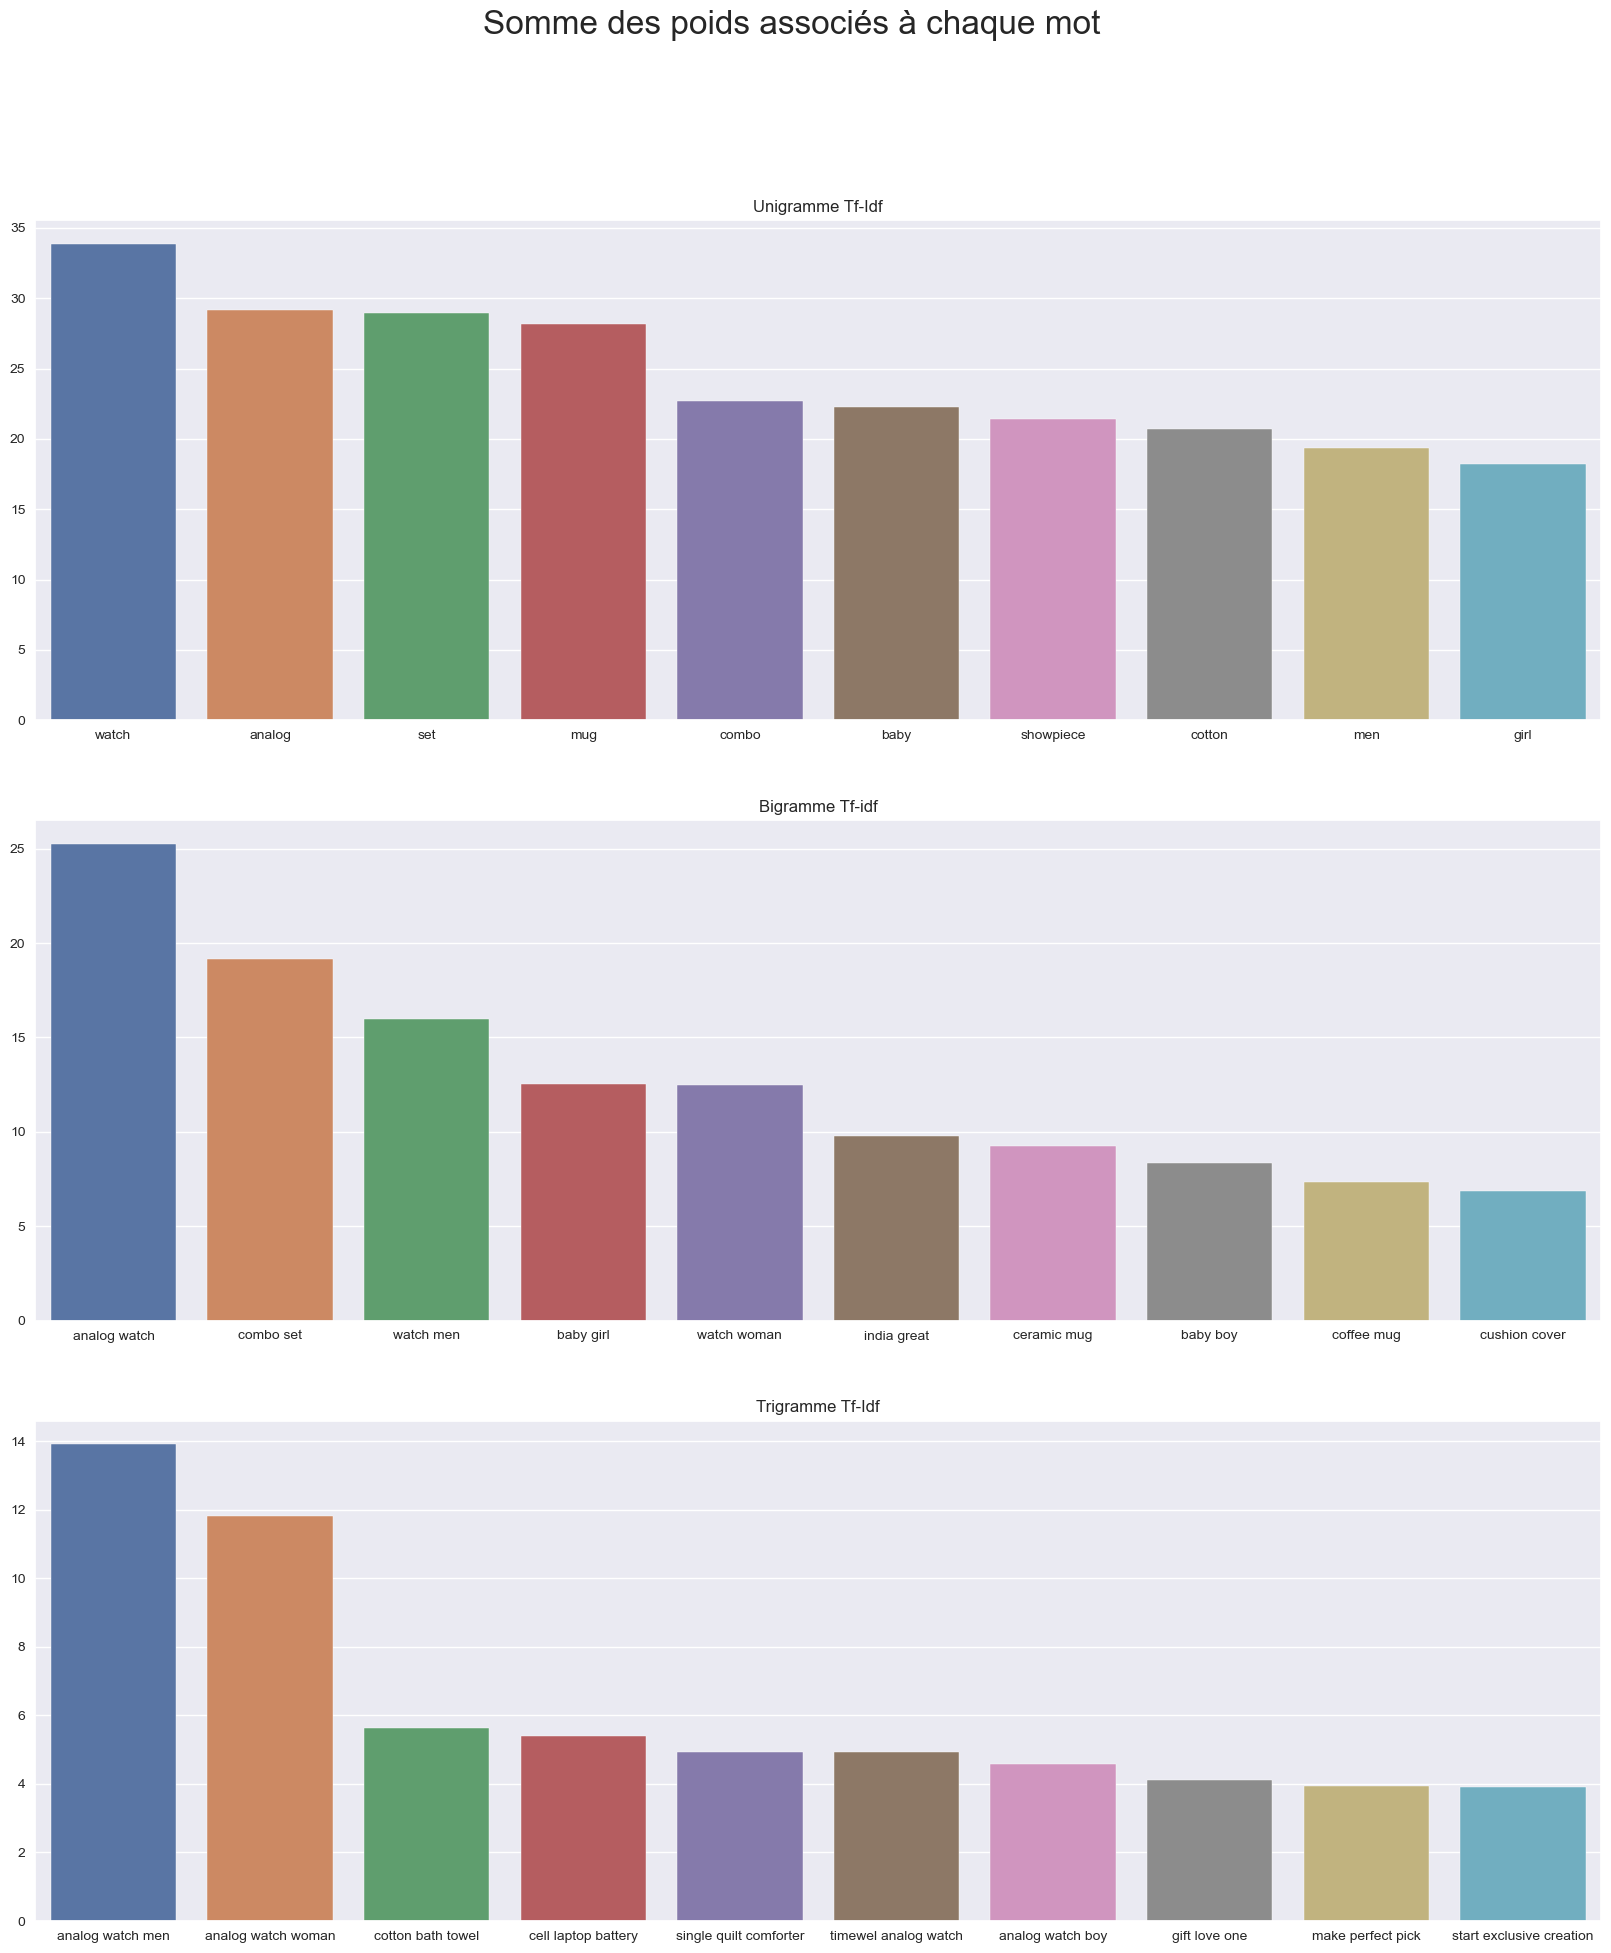

In [205]:
plot_n_gramms(cleaned_desc, TfidfVectorizer, [(1,1),(2,2),(3,3)], titles=['Unigramme Tf-Idf', 'Bigramme Tf-idf', 'Trigramme Tf-Idf'])

---

### Evaluation tf-idf

---Unigramme---
0 mots -- (ngramm:(1, 1)) Taille: (1050, 4407), Sparcity: 0.489 %
10 mots -- (ngramm:(1, 1)) Taille: (1050, 513), Sparcity: 2.755 %
20 mots -- (ngramm:(1, 1)) Taille: (1050, 227), Sparcity: 4.621 %
30 mots -- (ngramm:(1, 1)) Taille: (1050, 134), Sparcity: 6.231 %
40 mots -- (ngramm:(1, 1)) Taille: (1050, 91), Sparcity: 7.628 %
50 mots -- (ngramm:(1, 1)) Taille: (1050, 72), Sparcity: 8.526 %
60 mots -- (ngramm:(1, 1)) Taille: (1050, 61), Sparcity: 9.151 %
70 mots -- (ngramm:(1, 1)) Taille: (1050, 50), Sparcity: 9.808 %
80 mots -- (ngramm:(1, 1)) Taille: (1050, 37), Sparcity: 10.770 %
90 mots -- (ngramm:(1, 1)) Taille: (1050, 26), Sparcity: 11.908 %
100 mots -- (ngramm:(1, 1)) Taille: (1050, 20), Sparcity: 12.686 %
110 mots -- (ngramm:(1, 1)) Taille: (1050, 14), Sparcity: 13.898 %
120 mots -- (ngramm:(1, 1)) Taille: (1050, 11), Sparcity: 14.753 %
130 mots -- (ngramm:(1, 1)) Taille: (1050, 10), Sparcity: 15.010 %
140 mots -- (ngramm:(1, 1)) Taille: (1050, 9), Sparcity: 15.

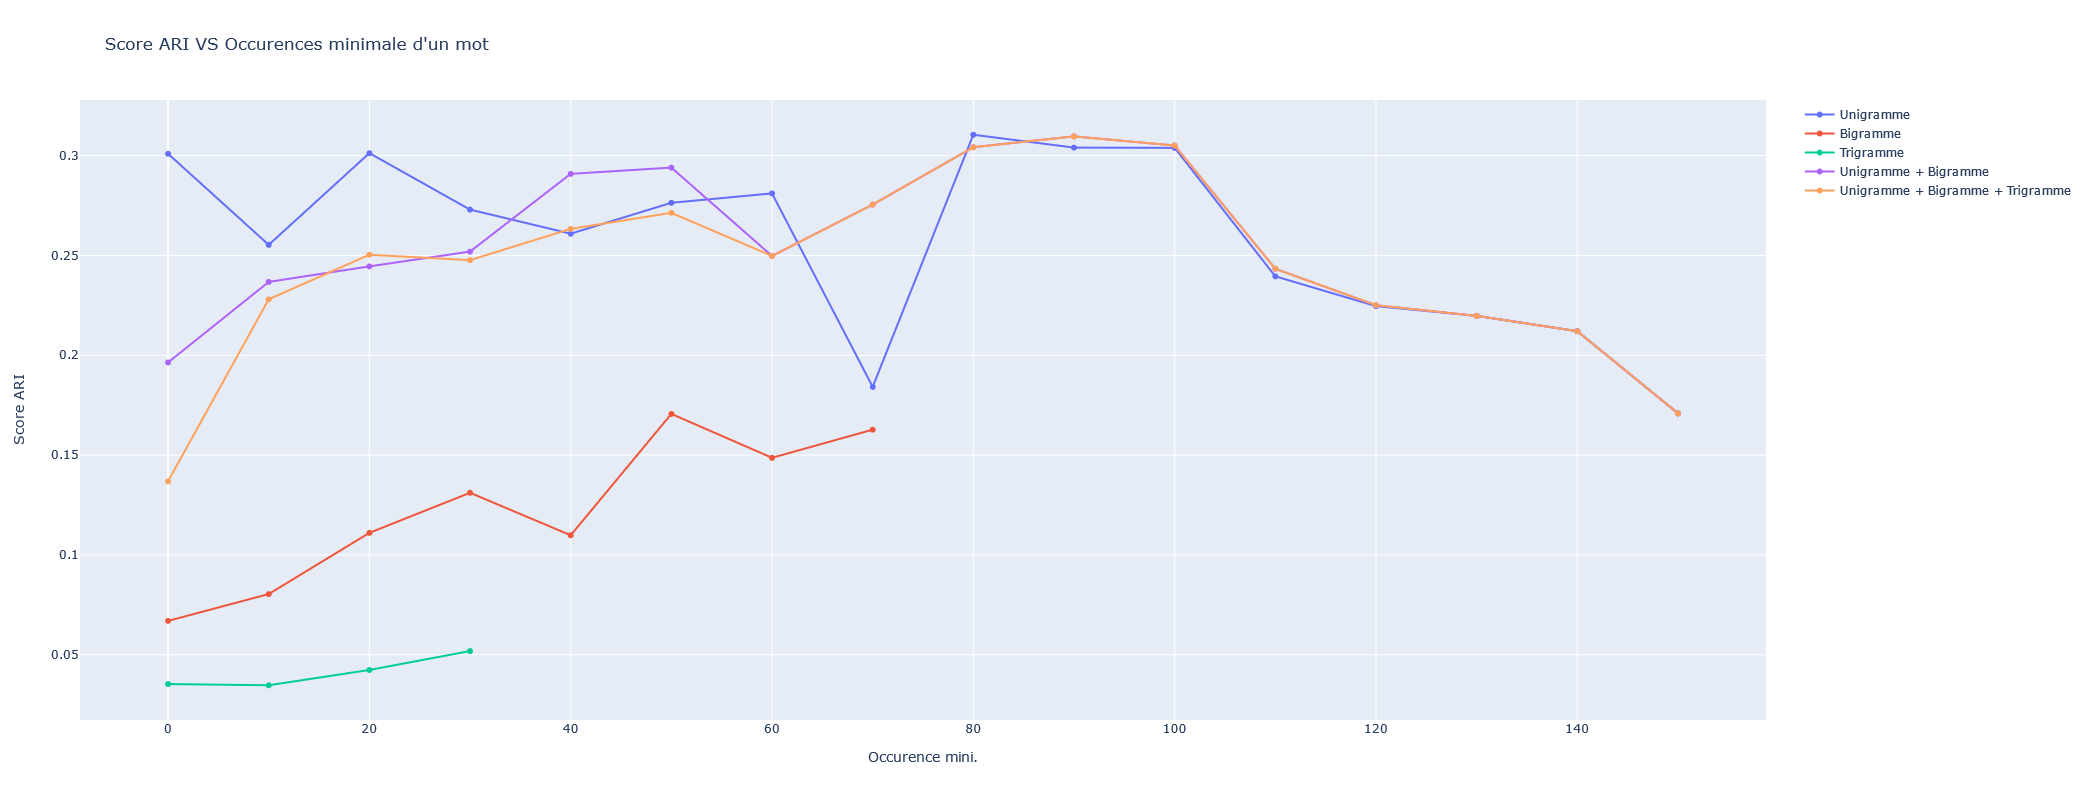

In [260]:
model = KMeans(n_clusters = 7, random_state=42)
vec = TfidfVectorizer

print('---Unigramme---')
tfidf, vectorizers_tfidf = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,1), debug=True)
print('---Bigramme---')
tfidf_bi, vectorizers_tfidf_bi = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 80, 10)), ngram=(2,2), debug=True) 
print('---Trigramme---')
tfidf_tri, vectorizers_tfidf_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 40, 10)), ngram=(3,3), debug=True) 
print('---Unigramme + Bigramme---')
tfidf_both, vectorizers_tfidf_both = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,2), debug=True)
print('---Unigramme + Bigramme + Trigramme---')
tfidf_uni_tri, vectorizers_tfidf_uni_tri = vectorized_ngrams(data=cleaned_desc, vec=vec, min_words=list(range(0, 160, 10)), ngram=(1,3), debug=True)

x_range = list(range(0, 160, 10))

plot_all_aris_score([tfidf, tfidf_bi, tfidf_tri, tfidf_both, tfidf_uni_tri], true_labels.label, x_value=x_range, model=model, 
                    legends= ['Unigramme', 'Bigramme', 'Trigramme', 'Unigramme + Bigramme', 'Unigramme + Bigramme + Trigramme'])

Le meilleur jeu d'entrainement est celui composé d'unigramme. <br>
Meilleur ARI score (0,31) atteint avec une occurence de 80 minimum. <br>

#### T-SNE

In [261]:
from sklearn.manifold import TSNE

In [262]:
best_tfidf = tfidf[8]
best_vectorizer_tfidf = vectorizers_tfidf[8]
kmeans.fit_transform(best_tfidf)

adjusted_rand_score(true_labels.label.values, kmeans.labels_)

0.3104474159904051

In [263]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    120
1    422
2    103
3     78
4    151
5     83
6     93
dtype: int64

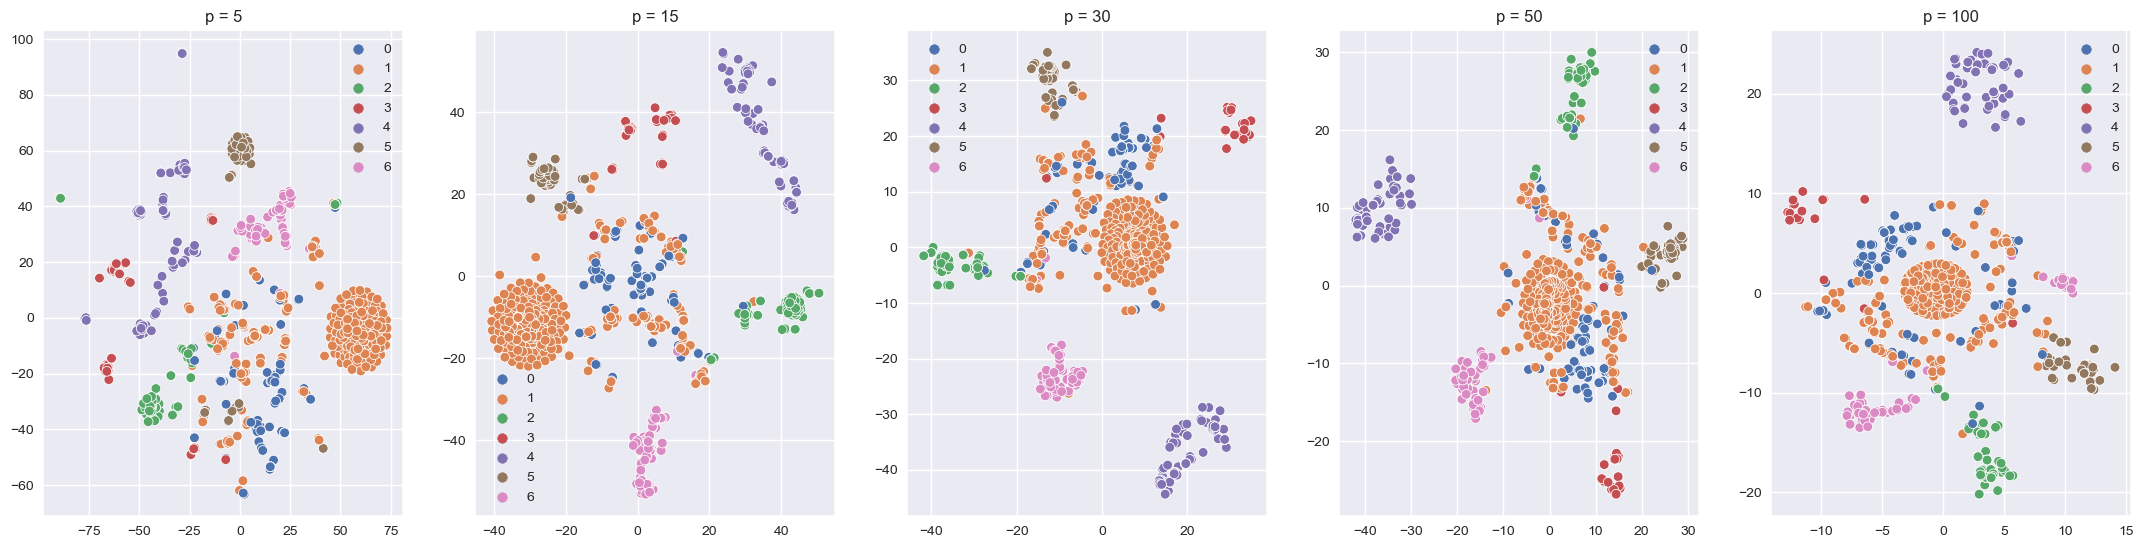

In [264]:
fig = plt.figure(figsize=(24,6))

perplexity = [5, 15, 30, 50, 100]

for ind, p in enumerate(perplexity):
    tsne = TSNE(perplexity=p, random_state=42, n_jobs=-1)
    X_embedded = tsne.fit_transform(best_tfidf)
    
    ax = fig.add_subplot(1,len(perplexity),ind+1)
    sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=kmeans.labels_, palette=sns.color_palette('deep', 7))
    ax.set_title(f'p = {perplexity[ind]}')
    
plt.show()

#### Quels sont les mots les plus déterminants pour chaque cluster ?

In [183]:
best_df = pd.DataFrame(data = best_bow.toarray(), columns=best_vectorizer.get_feature_names())
best_df['label'] = kmeans.labels_

top_5_words = []

for label in set(kmeans.labels_):
    top_5_words.append(best_df[best_df.label == label].drop('label', axis=1).sum(axis=0).sort_values(ascending=False)[:5].index.tolist())

top_5_words

[['design', 'model', 'quality', 'inch', 'make'],
 ['showpiece', 'gift', 'home', 'make', 'model'],
 ['ceramic', 'make', 'gift', 'quality', 'design'],
 ['baby', 'detail', 'girl', 'fabric', 'cotton'],
 ['watch', 'analog', 'analog watch', 'men', 'great'],
 ['set', 'combo', 'combo set', 'use', 'model'],
 ['inch', 'print', 'set', 'cotton', 'multicolor']]

#### Quels sont les mots les moins déterminants dans ce modèle ?

In [184]:
from sklearn.tree import DecisionTreeClassifier

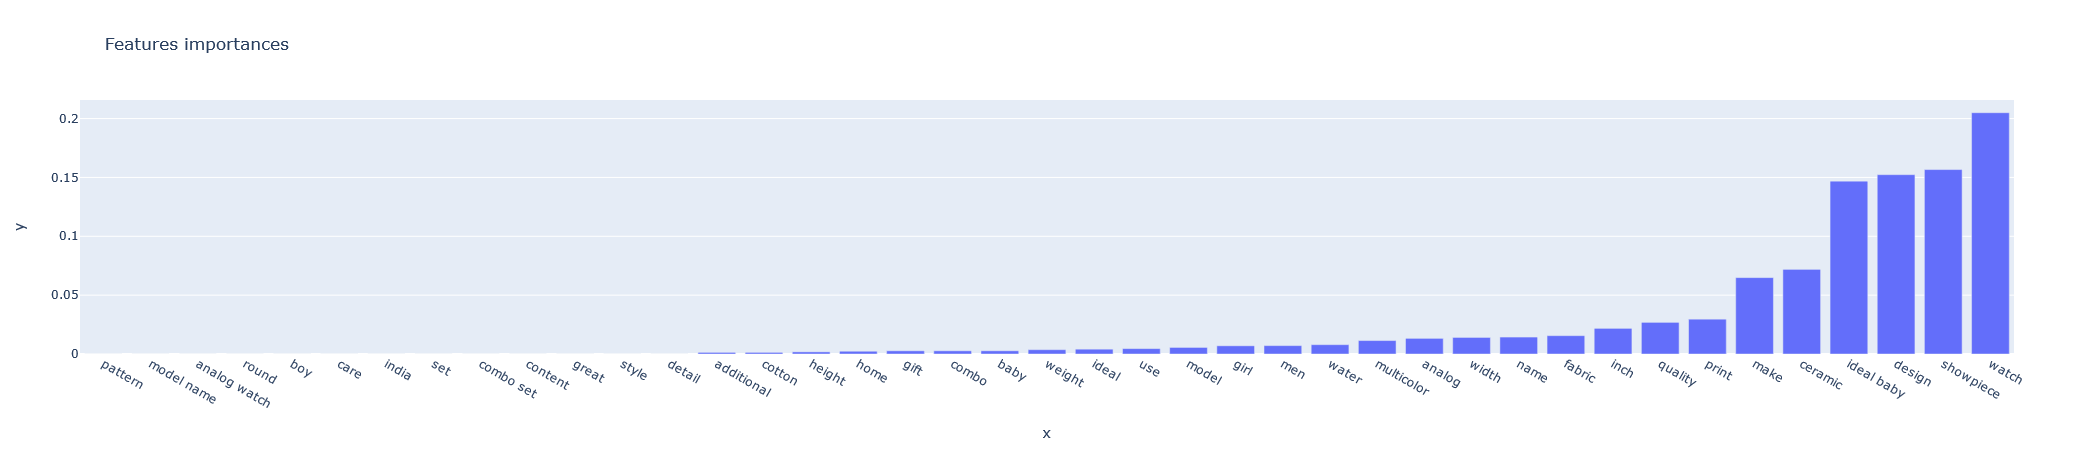

In [185]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(best_bow, kmeans.labels_)

feature_importances = pd.Series(dt.feature_importances_,
                                index = best_vectorizer.get_feature_names(),
                                name='Feature importance')\
                                .sort_values(ascending=True)

px.bar(data_frame=feature_importances, y=feature_importances.values, x=list(feature_importances.index), title='Features importances')